<a href="https://colab.research.google.com/github/vikramrajeevreddy/Machine_Learning_HW/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install surprise



     |████████████████████████████████| 11.8 MB 54 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619400 sha256=2601c4f55e9a5a5d88600ace6373d0e9fbf5ac7e8e314484f7bd1873385b666d
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [9]:
import pandas as pd
import numpy as np
from surprise import KNNBasic,Reader, Dataset, SVD,  prediction_algorithms
from surprise.model_selection import KFold, cross_validate
import matplotlib.pyplot as plt

In [63]:
ratings_df = pd.read_csv('./ratings_small.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines = 1)
data = Dataset.load_from_file('./ratings_small.csv', reader=reader)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [14]:

reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines = 1)

In [ ]:
Ratings_df=pd.read_csv('/content/drive/MyDrive/ML_Project/ratings.csv')

In [ ]:
data = Dataset.load_from_file('./ratings.csv', reader=reader)


In [19]:
pmf = prediction_algorithms.matrix_factorization.SVD(biased=False)
crossvalidated_pmf = cross_validate(pmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);
mae_mean = crossvalidated_pmf['test_mae'].mean()
rmse_mean = crossvalidated_pmf['test_rmse'].mean()


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0092  1.0125  1.0069  1.0069  1.0145  1.0100  0.0031  
MAE (testset)     0.7773  0.7796  0.7804  0.7777  0.7813  0.7793  0.0016  
Fit time          4.73    4.67    4.70    4.72    4.73    4.71    0.02    
Test time         0.23    0.22    0.15    0.15    0.14    0.18    0.04    


In [20]:
print(f'The average MAE of the Probabilistic Matrix Factorization (PMF) under 5 fold cross validation',mae_mean)
print(f'The average RMSE of the Probabilistic Matrix Factorization (PMF) under 5 fold cross validation',rmse_mean)

The average MAE of the Probabilistic Matrix Factorization (PMF) under 5 fold cross validation 0.7792719446460293
The average RMSE of the Probabilistic Matrix Factorization (PMF) under 5 fold cross validation 1.0100187241081255


In [71]:
similarity_options = {'user_based': True}
user_based_collaborative_filtering = KNNBasic(similarity_options=similarity_options)
cv_ub = cross_validate(user_based_collaborative_filtering, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);
mae_mean_ucb = cv_ub['test_mae'].mean()
rmse_mean_ucb = cv_ub['test_rmse'].mean()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9753  0.9730  0.9644  0.9608  0.9628  0.9672  0.0058  
MAE (testset)     0.7491  0.7478  0.7412  0.7393  0.7423  0.7439  0.0038  
Fit time          0.14    0.18    0.18    0.17    0.17    0.17    0.01    
Test time         2.11    1.80    2.12    1.82    1.80    1.93    0.15    


In [66]:
print(f'The average MAE of the user_based_collaborative_filtering under 5 fold cross validation',mae_mean_ucb)
print(f'The average RMSE of the user_based_collaborative_filtering under 5 fold cross validation',rmse_mean_ucb)

The average MAE of the user_based_collaborative_filtering under 5 fold cross validation 0.7442195539291456
The average RMSE of the user_based_collaborative_filtering under 5 fold cross validation 0.9682473447997717


In [70]:
similarity_options = {'user_based': False}
item_based_collaborative_filtering = KNNBasic(similarity_options=similarity_options)
cv_ibcf = cross_validate(item_based_collaborative_filtering, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

mae_mean_icb = cv_ibcf['test_mae'].mean()
rmse_mean_icb = cv_ibcf['test_rmse'].mean()


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9774  0.9765  0.9665  0.9577  0.9613  0.9679  0.0079  
MAE (testset)     0.7498  0.7489  0.7446  0.7371  0.7390  0.7439  0.0051  
Fit time          0.14    0.17    0.17    0.17    0.17    0.16    0.01    
Test time         1.80    1.81    1.80    1.78    1.81    1.80    0.01    


In [68]:
print(f'The average MAE of the item_based_collaborative_filtering under 5 fold cross validation',mae_mean_icb)
print(f'The average RMSE of the item_based_collaborative_filtering under 5 fold cross validation',rmse_mean_icb)

The average MAE of the item_based_collaborative_filtering under 5 fold cross validation 0.7447639007448822
The average RMSE of the item_based_collaborative_filtering under 5 fold cross validation 0.9690594554536942


In [38]:
user_based_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': True}, verbose=False)
user_based_msd = KNNBasic(sim_options={'name': 'msd', 'user_based': True}, verbose=False)
user_based_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': True}, verbose=False)

results1 = cross_validate(algo=user_based_cosine, data=data, measures=['rmse', 'mae'], cv=5)
results2 = cross_validate(algo=user_based_msd, data=data, measures=['rmse', 'mae'], cv=5)
results3 = cross_validate(algo=user_based_pearson, data=data, measures=['rmse', 'mae'], cv=5)


In [39]:
mae_mean_ub_cosine = results1['test_mae'].mean()
rmse_mean_ub_cosine = results1['test_mae'].mean()

rmse_mean_ub_msd = results2['test_rmse'].mean()
mae_mean_ub_msd = results2['test_mae'].mean()

rmse_mean_ub_pearson = results3['test_rmse'].mean()
mae_mean_ub_pearson = results3['test_mae'].mean()


In [49]:
print(f'Mean RMSE for User based CF using the cosine:',rmse_mean_ub_cosine)
print(f'Mean MAE for User based CF using the cosine:',mae_mean_ub_cosine)

print(f'Mean RMSE for User based CF using the msd:',rmse_mean_ub_msd)
print(f'Mean MAE for User based CF using the msd:',mae_mean_ub_msd)

print(f'Mean RMSE for User based CF using the pearson:',rmse_mean_ub_pearson)
print(f'Mean MAE for User based CF using the pearson:',mae_mean_ub_pearson)

Mean RMSE for User based CF using the cosine: 0.7670786143979565
Mean MAE for User based CF using the cosine: 0.7670786143979565
Mean RMSE for User based CF using the msd: 0.9681206734380019
Mean MAE for User based CF using the msd: 0.7438108837518466
Mean RMSE for User based CF using the pearson: 0.997603623147125
Mean MAE for User based CF using the pearson: 0.7722537617351256


Text(0, 0.5, 'Mean RMSE')

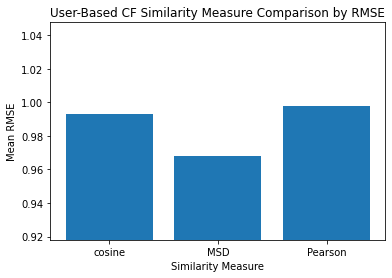

In [47]:
f = plt.figure(1)
values = [results1['test_rmse'].mean(), results2['test_rmse'].mean(), results3['test_rmse'].mean()]
labels = ('cosine', 'MSD', 'Pearson')
spaced = np.arange(len(labels))

plt.bar(x=spaced, height=values)
plt.xticks(spaced, labels)
plt.ylim(min(values) - .05, max(values) + .05)

plt.title('User-Based CF Similarity Measure Comparison by RMSE')
plt.xlabel('Similarity Measure')
plt.ylabel('Mean RMSE')


Text(0, 0.5, 'Mean MAE')

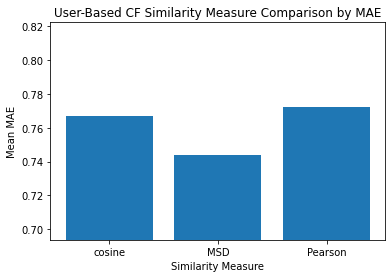

In [57]:
f = plt.figure(1)
values = [results1['test_mae'].mean(), results2['test_mae'].mean(), results3['test_mae'].mean()]
labels = ('cosine', 'MSD', 'Pearson')
spaced = np.arange(len(labels))

plt.bar(x=spaced, height=values)
plt.xticks(spaced, labels)
plt.ylim(min(values) - .05, max(values) + .05)

plt.title('User-Based CF Similarity Measure Comparison by MAE')
plt.xlabel('Similarity Measure')
plt.ylabel('Mean MAE')

In [73]:
item_based_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': False}, verbose=False)
item_based_msd = KNNBasic(sim_options={'name': 'msd', 'user_based': False}, verbose=False)
item_based_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': False}, verbose=False)

results1_ib = cross_validate(algo=item_based_cosine, data=data, measures=['rmse', 'mae'], cv=5)
results2_ib = cross_validate(algo=item_based_msd, data=data, measures=['rmse', 'mae'], cv=5)
results3_ib = cross_validate(algo=item_based_pearson, data=data, measures=['rmse', 'mae'], cv=5)


In [51]:
mae_mean_ib_cosine = results1_ib['test_mae'].mean()
rmse_mean_ib_cosine = results1_ib['test_mae'].mean()

rmse_mean_ib_msd = results2_ib['test_rmse'].mean()
mae_mean_ib_msd = results2_ib['test_mae'].mean()

rmse_mean_ib_pearson = results3_ib['test_rmse'].mean()
mae_mean_ib_pearson = results3_ib['test_mae'].mean()

In [52]:
print(f'Mean RMSE for item based CF using the cosine:',rmse_mean_ib_cosine)
print(f'Mean MAE for item based CF using the cosine:',mae_mean_ib_cosine)

print(f'Mean RMSE for item based CF using the msd:',rmse_mean_ib_msd)
print(f'Mean MAE for item based CF using the msd:',mae_mean_ib_msd)

print(f'Mean RMSE for item based CF using the pearson:',rmse_mean_ib_pearson)
print(f'Mean MAE for item based CF using the pearson:',mae_mean_ib_pearson)

Mean RMSE for item based CF using the cosine: 0.7750899163988818
Mean MAE for item based CF using the cosine: 0.7750899163988818
Mean RMSE for item based CF using the msd: 0.9348751013615907
Mean MAE for item based CF using the msd: 0.7211208179427665
Mean RMSE for item based CF using the pearson: 0.9899067750714228
Mean MAE for item based CF using the pearson: 0.7680225404056332


Text(0, 0.5, 'Mean RMSE')

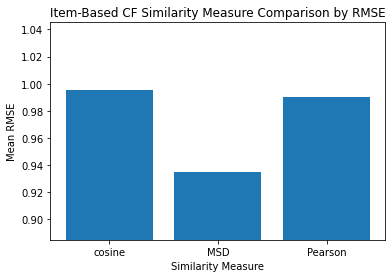

In [53]:
g = plt.figure(2)
values = [results1_ib['test_rmse'].mean(), results2_ib['test_rmse'].mean(), results3_ib['test_rmse'].mean()]
labels = ('cosine', 'MSD', 'Pearson')
spaced = np.arange(len(labels))

plt.bar(x=spaced, height=values)
plt.xticks(spaced, labels)
plt.ylim(min(values) - .05, max(values) + .05)

plt.title('Item-Based CF Similarity Measure Comparison by RMSE')
plt.xlabel('Similarity Measure')
plt.ylabel('Mean RMSE')
    

Text(0, 0.5, 'Mean MAE')

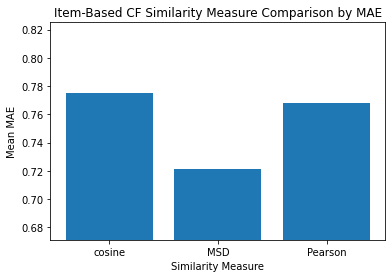

In [56]:
g = plt.figure(2)
values = [results1_ib['test_mae'].mean(), results2_ib['test_mae'].mean(), results3_ib['test_mae'].mean()]
labels = ('cosine', 'MSD', 'Pearson')
spaced = np.arange(len(labels))

plt.bar(x=spaced, height=values)
plt.xticks(spaced, labels)
plt.ylim(min(values) - .05, max(values) + .05)

plt.title('Item-Based CF Similarity Measure Comparison by MAE')
plt.xlabel('Similarity Measure')
plt.ylabel('Mean MAE')

In [58]:
similarities = ['cosine', 'msd', 'pearson']
measures = ['RMSE', 'MAE']
run_results = {
    'ucf': dict(),
    'icf': dict()
}

for similarity in similarities:
  user_based_cf = KNNBasic(sim_options={'name': similarity, 'user_based': True})
  item_based_cf = KNNBasic(sim_options={'name': similarity, 'user_based': False})

  print(f"Calculating {similarity} for User Based CF")
  cross_validate_user_based_cf = cross_validate(user_based_cf, data, measures, verbose=True, cv=5)

  print(f"Calculating {similarity} for Item Based CF")
  cross_validate_item_based_cf = cross_validate(item_based_cf, data, measures, verbose=True, cv=5)

  run_results['ucf'][similarity] = cross_validate_user_based_cf
  run_results['icf'][similarity] = cross_validate_item_based_cf
  

Calculating cosine for User Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0008  0.9961  0.9813  0.9904  0.9940  0.9925  0.0066  
MAE (testset)     0.7733  0.7685  0.7575  0.7680  0.7667  0.7668  0.0051  
Fit time          0.40    0.41    0.40    0.41    0.40    0.41    0.00    
Test time         2.07    1.77    2.03    1.77    1.79    1.88    0.14    
Calculating cosine for Item Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matr

In [59]:
min_k_value = 1
mean = 99999
ucf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': True}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, data, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  ucf_k_results.append(curr_mean)
  print(i)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0501  1.0579  1.0602  1.0621  1.0601  1.0581  0.0042  
MAE (testset)     0.8462  0.8479  0.8512  0.8524  0.8513  0.8498  0.0024  
Fit time          0.15    0.18    0.18    0.17    0.17    0.17    0.01    
Test time         0.85    0.83    0.83    0.81    1.10    0.88    0.11    
0
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

In [60]:
min_k_value = 1
mean = 99999
icf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': False}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, data, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  icf_k_results.append(curr_mean)

print(min_k_value, mean)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0639  1.0593  1.0642  1.0525  1.0504  1.0580  0.0057  
MAE (testset)     0.8538  0.8503  0.8559  0.8454  0.8436  0.8498  0.0047  
Fit time          5.97    4.00    4.18    3.99    4.38    4.50    0.75    
Test time         4.44    4.67    4.91    4.58    4.78    4.67    0.16    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

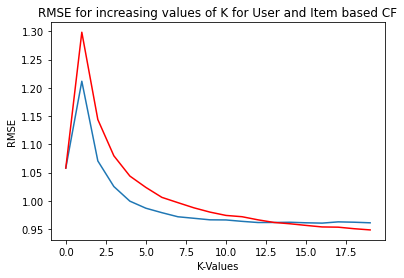

In [72]:
plt.plot(ucf_k_results)
plt.plot(icf_k_results, color='r')
plt.xlabel("K-Values")
plt.ylabel("RMSE")
plt.title("RMSE for increasing values of K for User and Item based CF")
plt.show()
